# Prophet Changing Seasonality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

### 1. Reading the Dataset

In [2]:
df = pd.read_csv('../UPDATE-TSA-NOTEBOOKS/Data/airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

### 2.1 Model Additive

/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


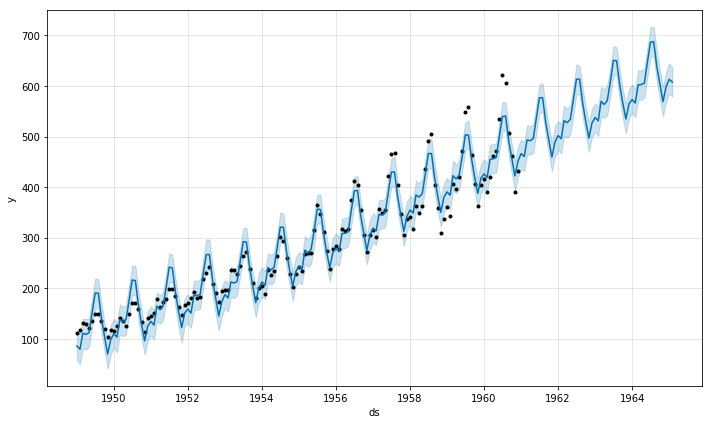

In [18]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output4.png');

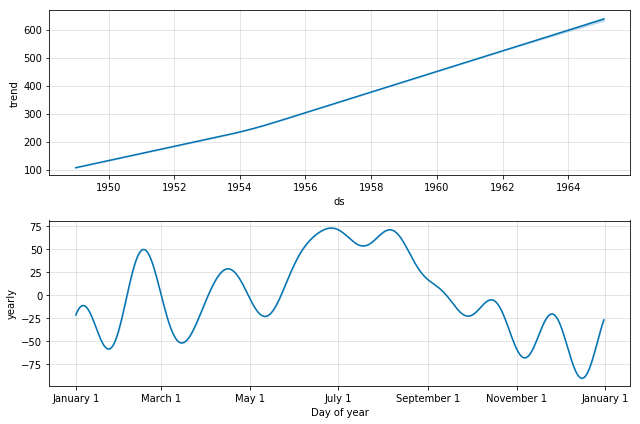

In [19]:
fig = m.plot_components(forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output5.png');

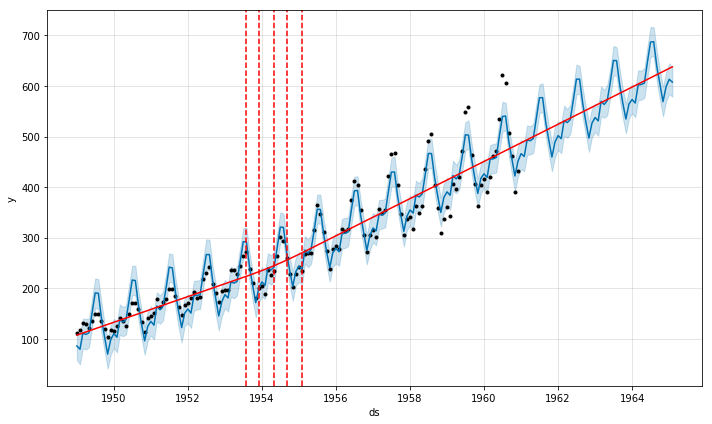

In [20]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output6.png');

### 2.2 Model Multiplicative

/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


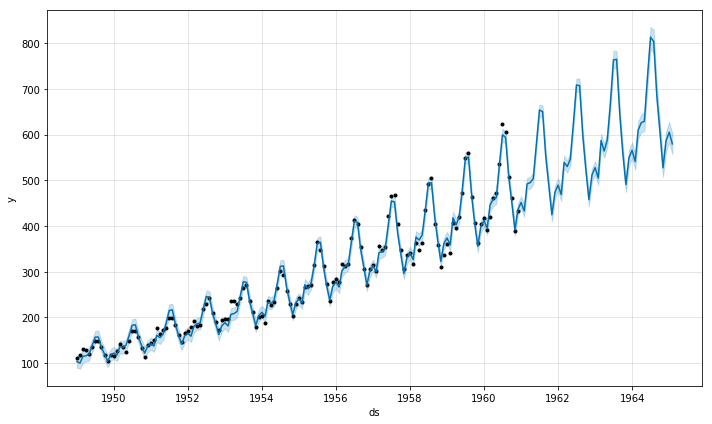

In [21]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output7.png');

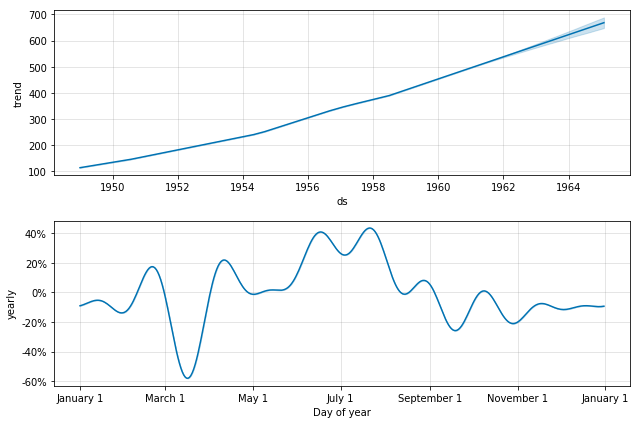

In [22]:
fig = m.plot_components(forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output8.png');

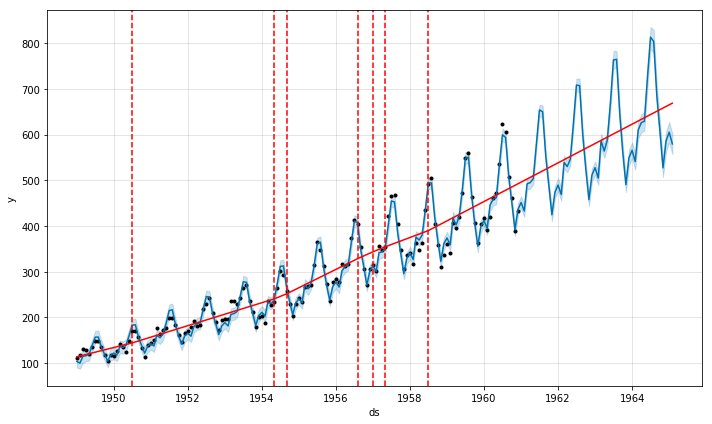

In [23]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output9.png');